<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.5 Local Outlier Factor (LOF) による外れ値検知
- 目的
    - LOFを用いて外れ値を検知する
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://hktech.hatenablog.com/entry/2018/10/10/232427

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 数値や特徴量の確認
display(X.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 1,2次元目（sepal width (cm), petal length (cm)）を利用
X = iris.data[:, (1, 2)]

In [4]:
X[:5]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4]])

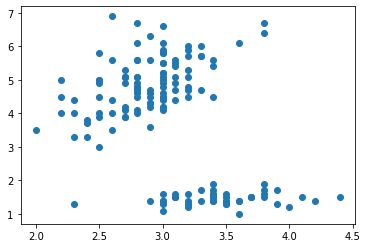

In [5]:
# このデータを対象に異常な点を検知する
plt.scatter(X[:,0], X[:,1])

In [6]:
clf = LocalOutlierFactor(n_neighbors=7, contamination=0.005)
pred = clf.fit_predict(X)

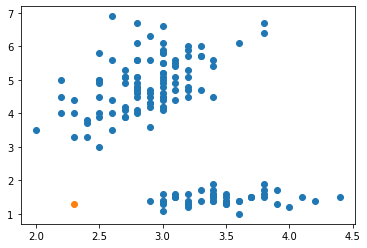

In [7]:
# 正常データのプロット
plt.scatter(X[:,0][np.where(pred > 0)], X[:,1][np.where(pred > 0)])

# 異常データのプロット
plt.scatter(X[:,0][np.where(pred < 0)], X[:,1][np.where(pred < 0)])
plt.show()